In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


# 1. Data Augmentation
원본 이미지에 인위적인 변화를 주는 것. 
인위적으로 변화를 준 이미지는 충분히 학습에 활용될 수 있는 데이터가 된다.

dataset 이 너무 적은 경우 overfitting 문제가 발생함

![data augmetation](keras_data_augmentation_jitter.png)


keras에서는 dta augmentation을 통해 해결


- Translations
- Rotations
- Changes in scale
- Shearing
- Horizontal (and in some cases, vertical) flips

![image data augmetation](keras_data_augmentation_random_adjustments.jpg)


Type #1: existing dataset을 사용해 학습 dataset를 재구성함
  
<img src=keras_data_augmentation_dataset_generation.png width=300>
  
  

Type #2: In-place/on-the-fly data augmentation-keras에서 구현
   - batch 수 만큼 ImageDataGenerator로 실시간 생성 후 원본 제외하고 생성된 데이터 셋으로 학습

<img src=keras_data_augmentation_in_place.png width=300>

잘못된 방식
<img src=keras_data_augmentation_incorrect.png  width=300>

In [27]:
#영상 읽는법 2가지
img = tf.keras.preprocessing.image.load_img('a crash landing of love.jpg')  # 이미지 객체임
data = tf.keras.preprocessing.image.img_to_array(img) #data 만 추출/이미지를 numpy 객체로
print(data.shape)
sample = expand_dims(data,0)  #4차원
print(sample.shape)

(310, 600, 3)
(1, 310, 600, 3)


In [28]:
# opencv 사용해 이미지 loaidng
data = cv2.imread('a crash landing of love.jpg')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
sample = expand_dims(data,0)
print(sample.shape)

(1, 310, 600, 3)


## 수평, 수직 이동

In [35]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2) #어떤 기하학적인 변형을 할지 설정
obj = generator.flow(sample, batch_size=1)   

(1, 310, 600, 3)
float32
(310, 600, 3)


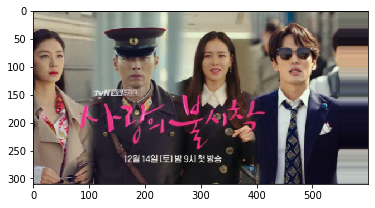

In [36]:
#실행할때마다 다른 이미지 나온다.
image = obj.next()
print(image.shape) #4차원
print(image.dtype) #float32

print(image[0].shape) #image[0] →3차원으로 바꿔줌
#plt.imshow(image[0].astype('uint8'))  # plt로 할때는 0~1사이 or 타입 uint8로 
plt.imshow(image[0]/255)  #255로 나눠주면 0~1사이 값으로 추출

In [31]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.2, rescale=1./255) #rescale이 있으면 이후 255로 나눠줄 필요 없음
# rescale 해주면 정규화하고, imshow할때 type변한 필유없다.
obj = generator.flow(sample, batch_size=1)

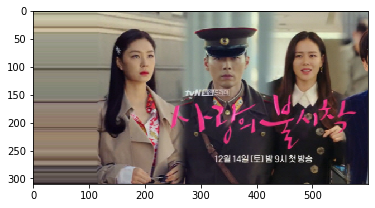

In [32]:
image = obj.next()
plt.imshow(image[0])

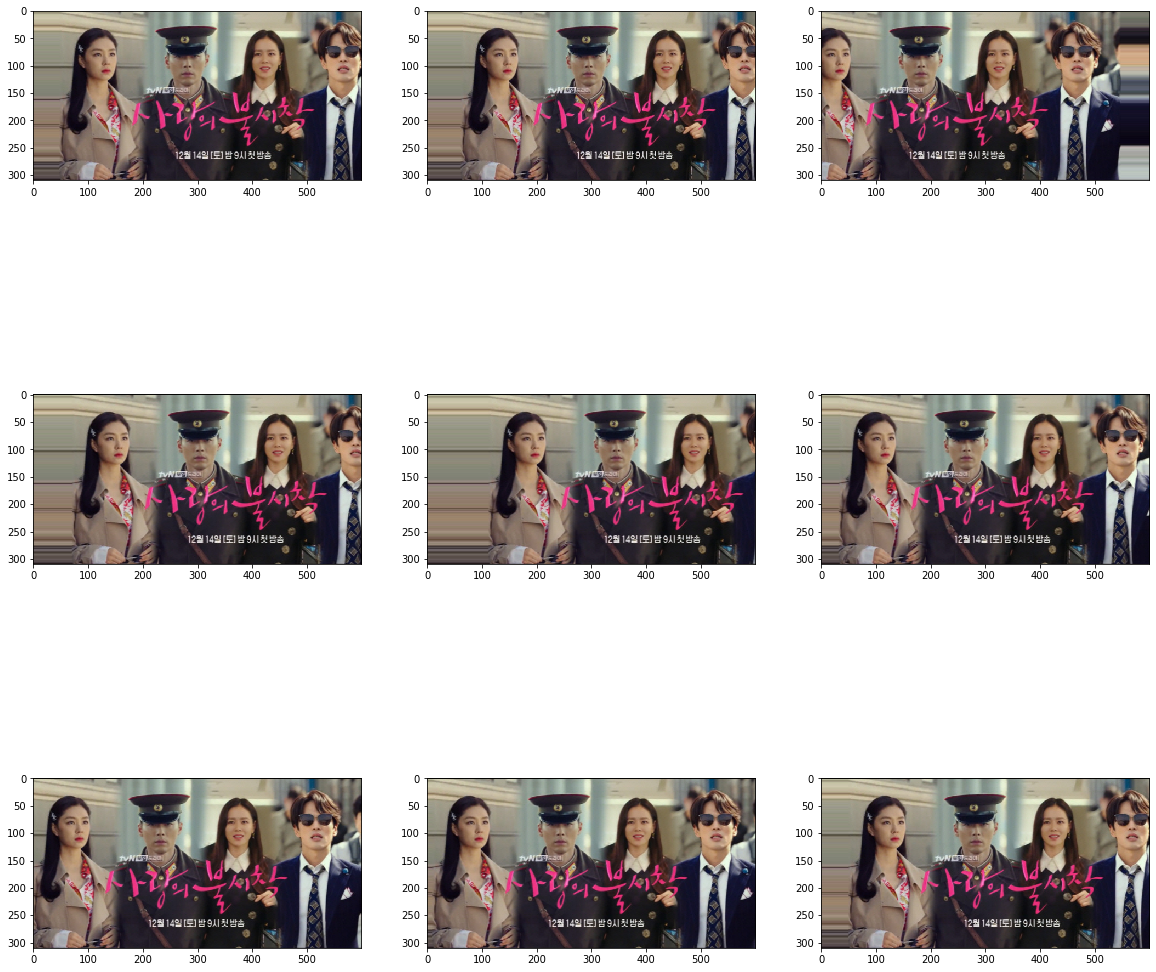

In [16]:
fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1) 
    image = obj.next() 
    plt.imshow(image[0])   

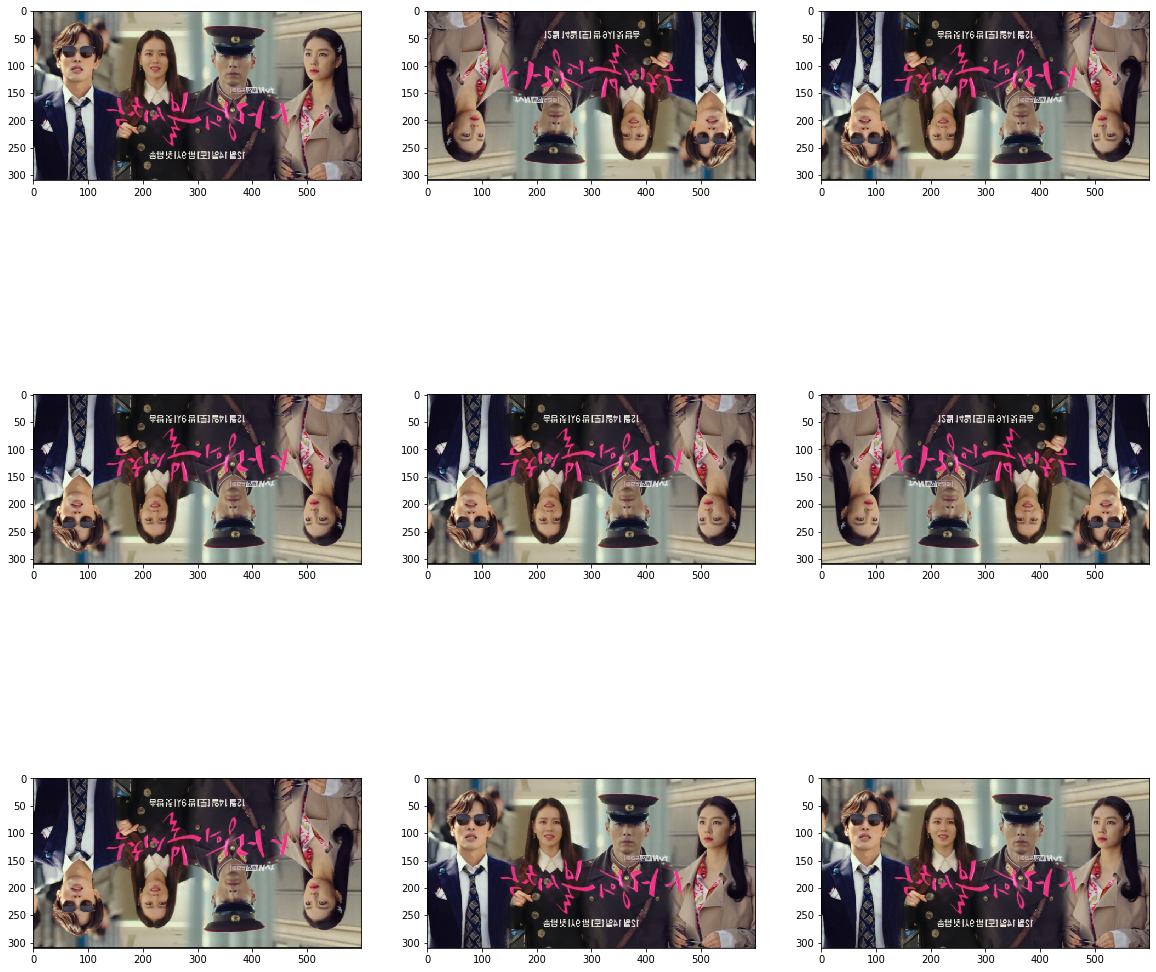

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    horizontal_flip = True, vertical_flip = True, #수평/수직 flip
    rescale=1./255)
obj = generator.flow(sample, batch_size=1) 

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

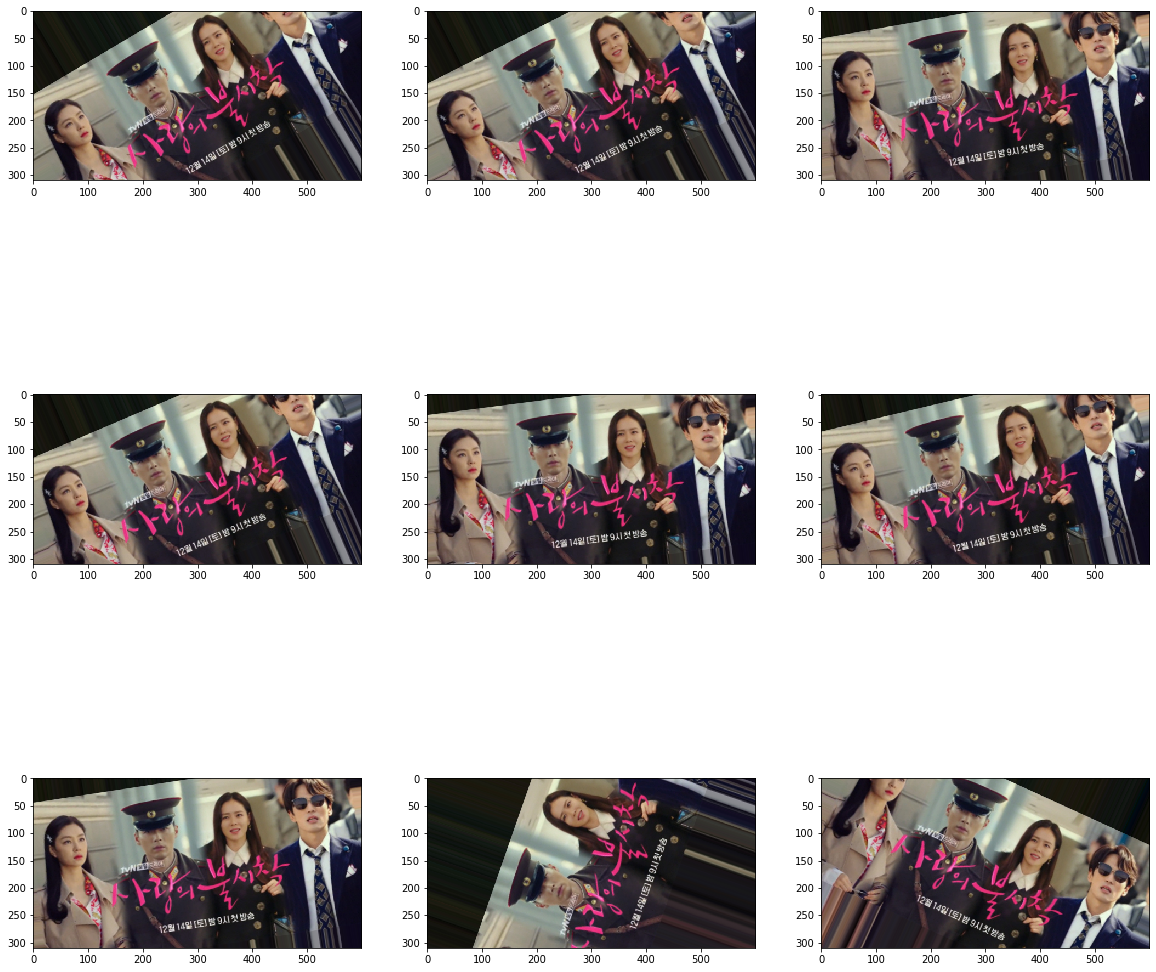

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90, #+-90도 범위 내에서 회전
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   
    

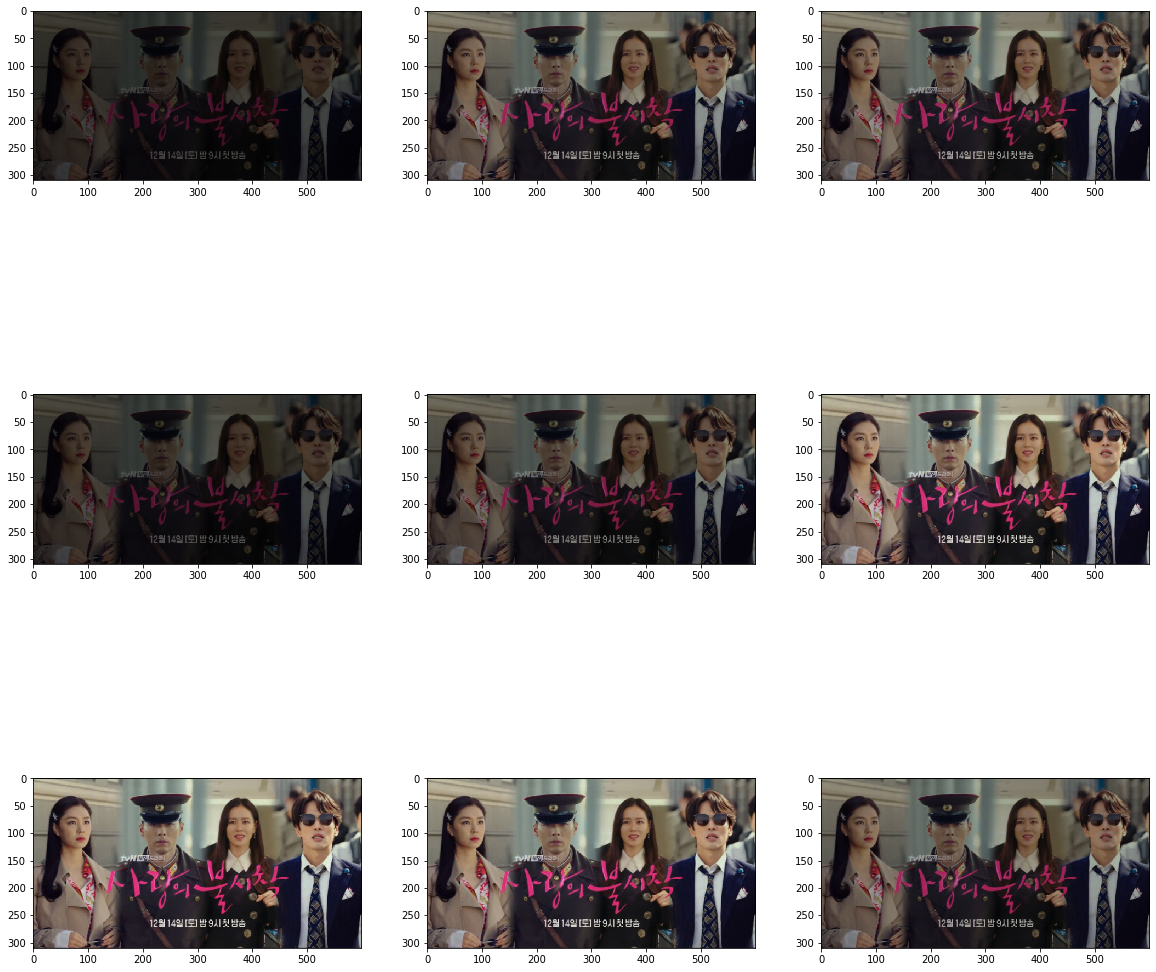

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0], #밝기 변화
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

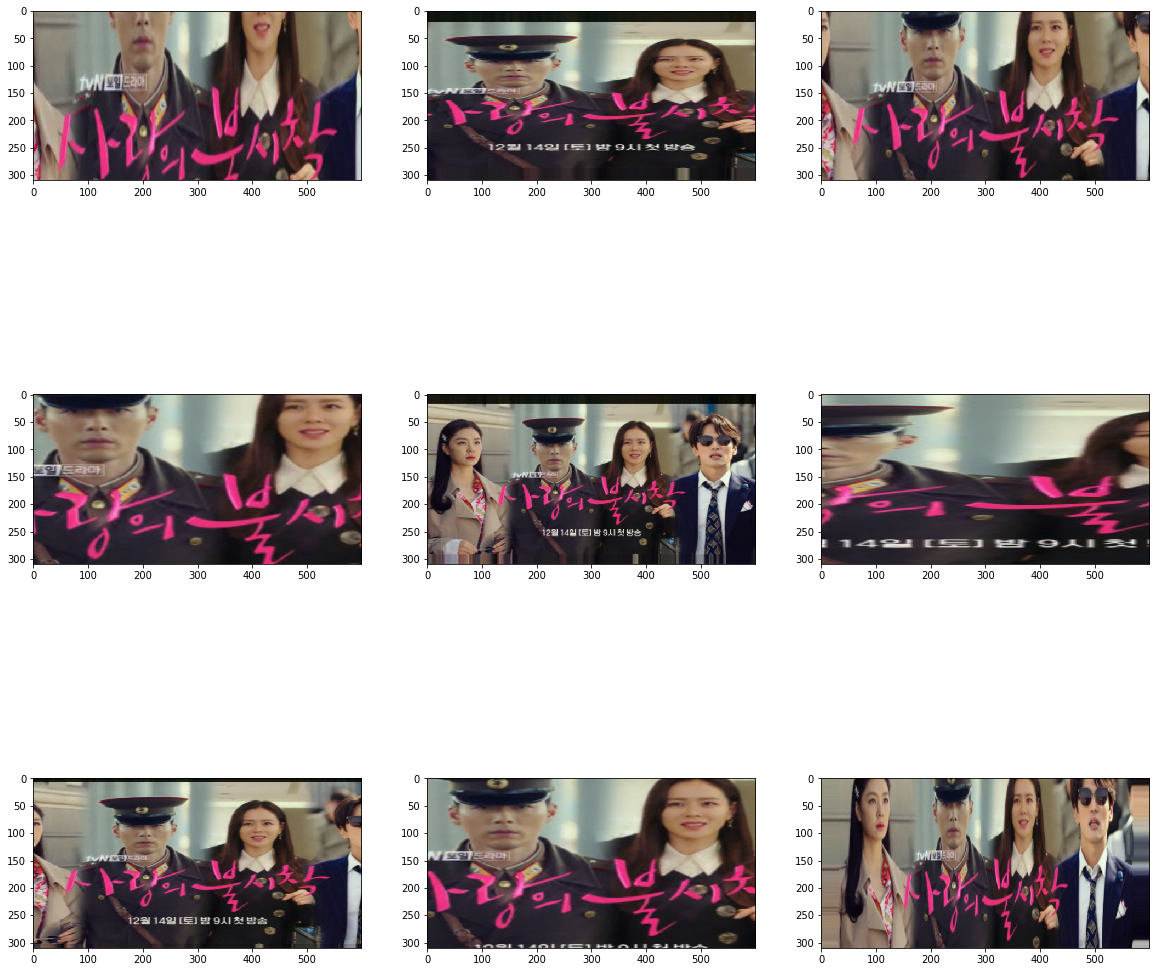

In [33]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

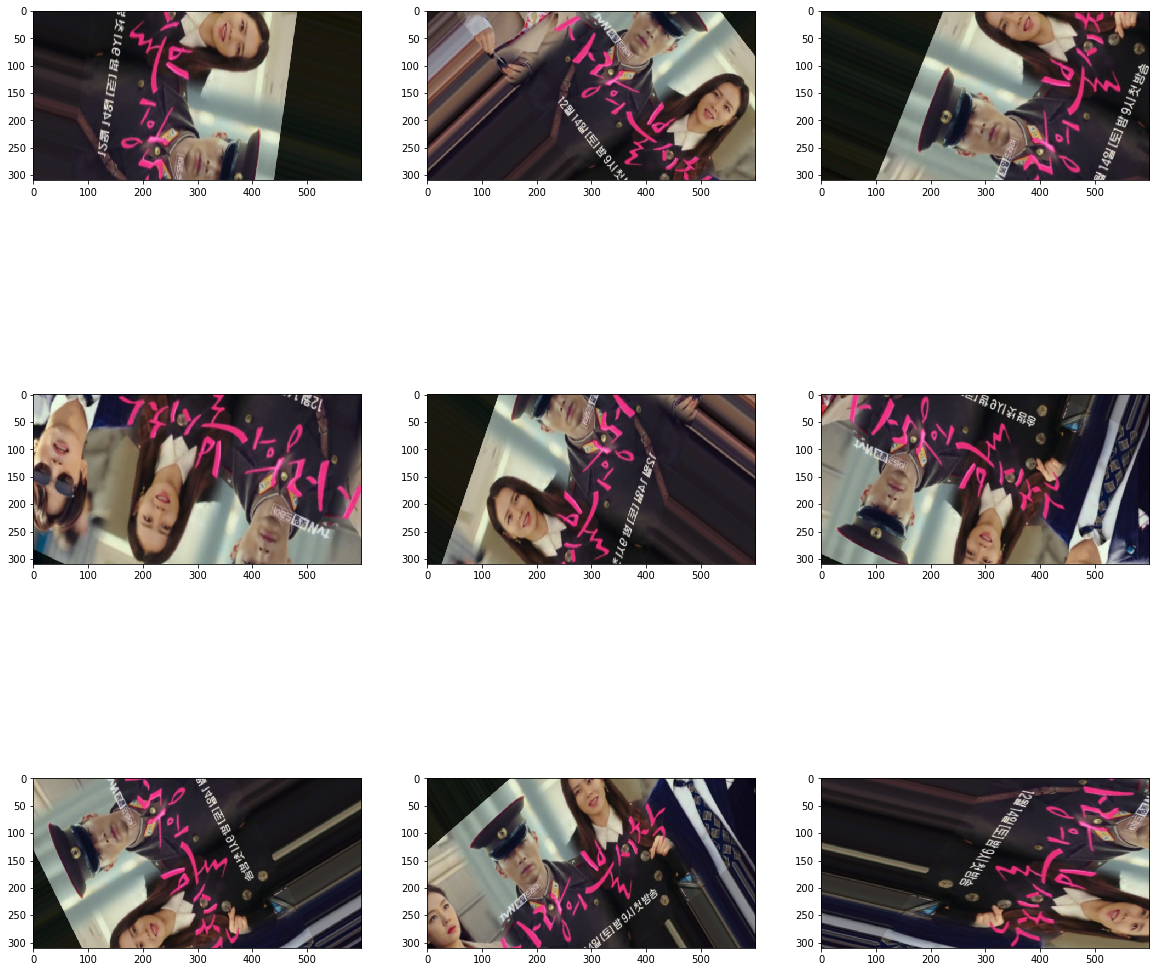

In [20]:
#한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1) #batch_size: 넘겨준 데이터 중에서 몇개를 사용할 것인지

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

In [37]:
# 파일로 저장하기
obj = generator.flow(sample, batch_size=1, save_to_dir='tmp',
                     save_prefix="image", save_format="jpg")
#tmp폴더는 경로내 생성되어 있어야 함
for i in range(0, 5):
    obj.next()

In [50]:
# 2.디렉토리로부터 augmentation
#augsample/c1/2개 이미지
#augsample/c2/6개 이미지    
#augsample/c3/1개 이미지

obj = generator.flow_from_directory(
    'hard_handwriting_shape',
    target_size=(150, 150),  #읽어올 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size=4, #8개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode='binary')  # binary(label)  |  categorical(one-hot)

Found 106 images belonging to 4 classes.


In [51]:
iterations = 2
for i, (img, label) in enumerate(obj):
    n_img = len(label) # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

[3. 2. 2. 0.]
(4, 150, 150, 3)
[3. 2. 3. 0.]
(4, 150, 150, 3)


In [52]:
# 저장하기
obj = generator.flow_from_directory(
    'hard_handwriting_shape',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='tmp')

iterations = 2
for i, (img, label) in enumerate(obj):
    n_img = len(label)  #폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# aug 폴더하나에 8개이미지 출력됙다.  class별로 저정할수 없나?(좀더 찾아봐야함)

Found 106 images belonging to 4 classes.
[2. 1. 2. 3.]
(4, 150, 150, 3)
[1. 2. 0. 3.]
(4, 150, 150, 3)


#  2. 도형 

In [53]:
np.random.seed(5)

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0 
for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='hard_handwriting_shape/tmp', 
                               save_prefix='tri', save_format='png'):
    i += 1 #이 for문은 무한으로 반복되기 때문에,
    if i > 30: #원하는 반복횟수를 지정하여 지정된 반복횟수가 되면 빠져나오도록 해야합니다. 
        break

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')
#generate된 영상이 4차원이므로, 4차원으로 만들어줄 필요 없음
test_datagen = ImageDataGenerator(rescale=1./255) #test data는 기하학적 변형X
test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3, #shuffle=False means '섞지마'
        class_mode='categorical', shuffle=False) #categorical=one-hot encoding

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [56]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(train_generator,steps_per_epoch=15*100, epochs=2, #200 
                    #epoch 한번 할때마다 1500개 데이터 만들어짐
                    validation_data=test_generator, validation_steps=5) 
#validation했으므로 따로 evaluate할 필요없음
#accuracy=train a. but test a.(val_accuracy)가 중요

Epoch 1/2
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2566 - accuracy: 0.8927 - val_loss: 0.0333 - val_accuracy: 0.8000
Epoch 2/2
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 1.2914e-05 - val_accuracy: 0.8000


In [57]:
#모델 예측하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps = 5) # batch_size=3, 15개가 생성됨
print(output) #predict =마지막 층까지 계산하라

T = test_generator.classes
print(T)
p = np.argmax(output, axis=1)
print(p)

sum((T == p)*1) / len(T)

#모델 평가하기
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

-- Predict --
[[8.26945007e-01 1.73043668e-01 1.13255528e-05]
 [1.05524248e-06 1.22148471e-04 9.99876738e-01]
 [9.97615933e-01 2.39867836e-06 2.38168216e-03]
 [9.99881148e-01 5.35664185e-06 1.13469185e-04]
 [9.98761177e-01 4.19513725e-07 1.23841094e-03]
 [9.09504670e-05 9.99902129e-01 6.90145589e-06]
 [2.72573629e-06 1.15450390e-03 9.98842716e-01]
 [6.90495363e-05 9.99681711e-01 2.49301142e-04]
 [1.00180769e-05 9.99985218e-01 4.79410892e-06]
 [4.55965430e-01 1.11497482e-02 5.32884777e-01]
 [5.97716216e-03 6.91098273e-02 9.24913049e-01]
 [3.14873532e-08 9.02050772e-08 9.99999881e-01]
 [1.50608514e-06 1.24790104e-05 9.99986053e-01]
 [2.46758664e-05 4.34987868e-08 9.99975324e-01]
 [1.48306484e-07 2.14532475e-10 9.99999881e-01]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 2 0 0 0 1 2 1 1 2 2 2 2 2 2]
0.800000011920929


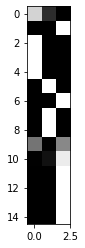

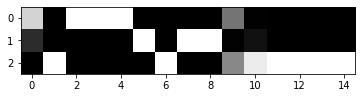

In [61]:
plt.imshow(output,cmap='gray')
plt.show() #white=완전히 다른 것으로 인식/gray=혼란스러워함
plt.imshow(output.T,cmap='gray') #T=transpose

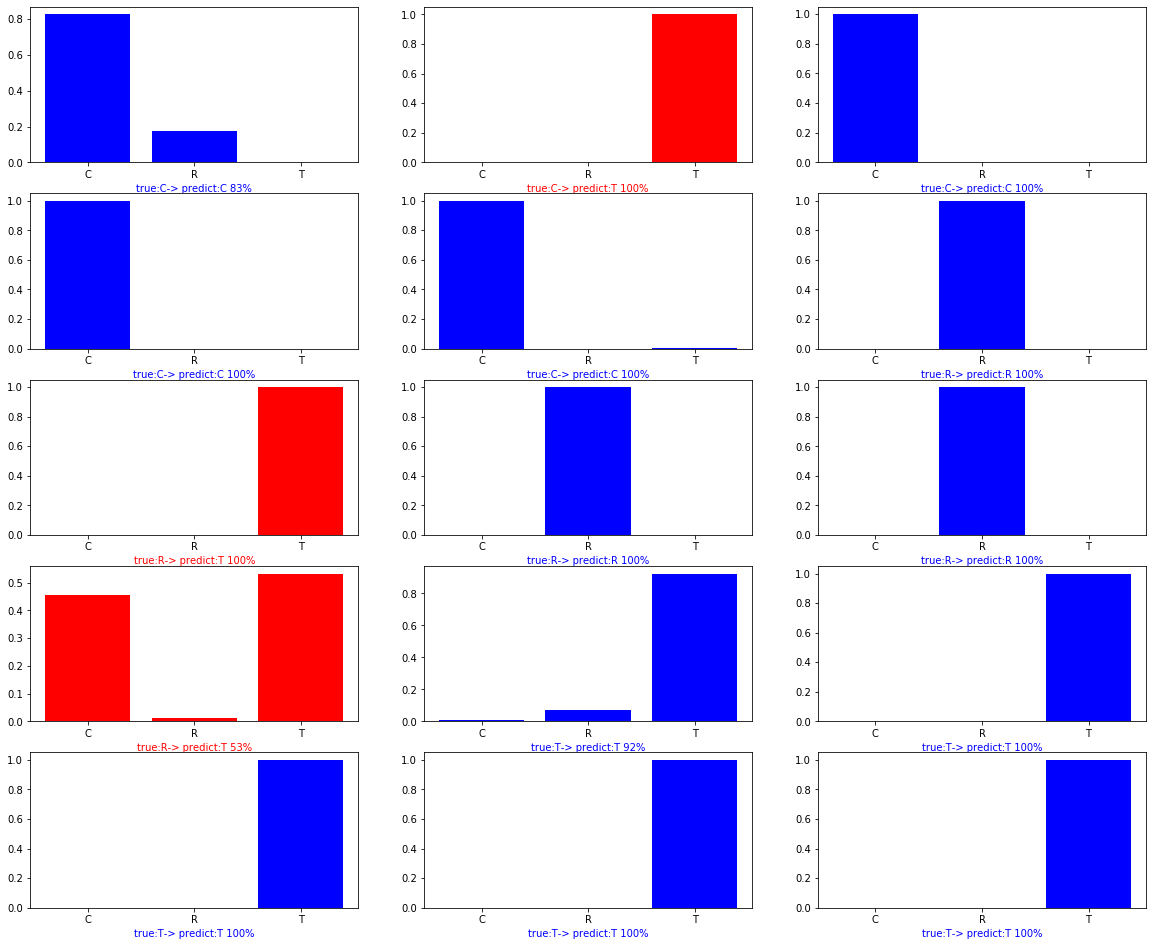

In [80]:
labels=['C','R','T']

plt.figure(figsize=(20,20))

idx=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
cc=3
rr= int(len(idx)/cc)+1

for k in range(len(idx)):        
  i = idx[k]             
  c =  "blue" if p[i]==T[i] else "red" #blue=정답 red=오답
  plt.subplot( rr ,cc, k+1)
  plt.bar(labels, output[i], color=c)
  plt.xlabel("true:{}-> predict:{} {:2.0f}%".format(
      labels[int(T[i])], labels[p[i]], 100*np.max(output[i], axis=0)), color=c)

In [89]:
test_generator= test_datagen.flow_from_directory('hard_handwriting_shape/test',
                                                 target_size=(24,24),batch_size=15,
                                                 class_mode='binary',shuffle=False)
X,T=test_generator.next()
# print(T[0].shape) #(15, 24, 24, 3)
# print(T[1].shape) #(15,) 
output=model.predict(X)
p=np.argmax(output, axis=1)
idx=np.where(p!=T)
idx-idx[0]

plt.figure(figsize=(20,20))

cc=3
rr= int(len(idx)/cc)+1

for k in range(len(idx)) :        
  i = idx[k]             
  c = "blue" if p[i]==T[i] else "red"    
  plt.subplot( rr ,cc, k+1)
  plt.imshow(X_test[i,:,:,0], extent=[0, 0.8, 0.5, 0.9],
             aspect='auto', zorder=10, cmap="gray")
  plt.ylim(0.0, 1.0)
  plt.bar(labels, output[i], color=c)
  plt.xlabel("true:{}->  predict:{} {:2.0f}%".format(
      labels[int(T[i])], labels[p[i]],100*np.max(output[i], axis=0)), color = c)

#epoch할때마다 원본데이터가 중첩되서 사용되기 때문에 원본데이터 사용X

Found 15 images belonging to 3 classes.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1440x1440 with 0 Axes>

# 3. dog cat  augmentation

- https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/
- https://www.kaggle.com/c/dogs-vs-cats/data
- 학습 데이터로 1,000장의 고양이 사진과 1,000장의 강아지 사진을 사용 (kaggle  25,000자)
- 검증 데이터로는 각각 400장 사용

In [56]:
img = load_img('cat.jpg') 
x = img_to_array(img)
print(x.shape)  # w,h,c 인직 확인

(414, 500, 3)


In [57]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 검증 및 테스트 이미지는 augmentation을 적용하지 않음(이미지 원본을 사용)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train', 
        target_size=(150, 150), 
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [59]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [60]:
# steps_per_epoch는 한 세대마다 몇 번 생성기로부터 데이터를 얻을지를 나타내는 값
# 한 세대마다 사용되는 학습데이터의 수는 steps_per_epoch * batch_size
        
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,    # 2000/16     한번에 125개씩 생성
        epochs=5,  #50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)     # 800/16   한번에 50개씩 생성

Epoch 1/5
125/125 [==============================] - 60s 478ms/step - loss: 0.7567 - accuracy: 0.5470 - val_loss: 0.6673 - val_accuracy: 0.6587
Epoch 2/5
125/125 [==============================] - 31s 251ms/step - loss: 0.6713 - accuracy: 0.5930 - val_loss: 0.6047 - val_accuracy: 0.6900
Epoch 3/5
125/125 [==============================] - 32s 254ms/step - loss: 0.6366 - accuracy: 0.6400 - val_loss: 0.5845 - val_accuracy: 0.6650
Epoch 4/5
125/125 [==============================] - 32s 258ms/step - loss: 0.6155 - accuracy: 0.6770 - val_loss: 0.3707 - val_accuracy: 0.7225
Epoch 5/5
125/125 [==============================] - 32s 252ms/step - loss: 0.6039 - accuracy: 0.6775 - val_loss: 0.5344 - val_accuracy: 0.7100


In [61]:
# 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator( test_generator,       steps = 5)
print(scores[1])

-- Evaluate --
0.699999988079071


In [62]:
# augmentation 없이  학습
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255 )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train',  # this is the target directory
        target_size=(150, 150),  # 모든 이미지의 크기가 150x150로 조정됩니다.
        batch_size=batch_size,
        class_mode='binary')  # binary_crossentropy 손실 함수를 사용하므로 binary 형태로 라벨을 불러와야 합니다.

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5, # 50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save("smallcatdog.h5")
scores = model.evaluate_generator( test_generator,       steps = 5)
print(scores[1])

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - 29s 230ms/step - loss: 0.7047 - accuracy: 0.5070 - val_loss: 0.6597 - val_accuracy: 0.6137
Epoch 2/5
125/125 [==============================] - 29s 230ms/step - loss: 0.6669 - accuracy: 0.6120 - val_loss: 0.5642 - val_accuracy: 0.6538
Epoch 3/5
125/125 [==============================] - 28s 227ms/step - loss: 0.6212 - accuracy: 0.6625 - val_loss: 0.6620 - val_accuracy: 0.6463
Epoch 4/5
125/125 [==============================] - 28s 227ms/step - loss: 0.5665 - accuracy: 0.7090 - val_loss: 0.6516 - val_accuracy: 0.6513
Epoch 5/5
125/125 [==============================] - 29s 232ms/step - loss: 0.5395 - accuracy: 0.7405 - val_loss: 0.4991 - val_accuracy: 0.7188
accuracy: 75.00%


# 4. imagenet에서 검색해서 다운하기



In [2]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

In [4]:
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289") #ship synset  wnetid
soup = BeautifulSoup(page.content, 'html.parser')
str_soup=str(soup)
split_urls=str_soup.split('\r\n')
print(len(split_urls))

1262


In [5]:
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')
bikes_str_soup=str(bikes_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')
print(len(bikes_split_urls))

1345


In [25]:
def url_downalod(urls, path, prefix) :    
    idx = 0
    for url in urls :
        try:
            resp = urllib.request.urlopen(url)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            if ( len(image.shape)) == 3 :
                print(url)
                idx += 1
                save_path = path + '/' + prefix + str(idx)+'.jpg'
                cv2.imwrite(save_path,image)
        except :
            None


In [ ]:
url_downalod(split_urls, 'imagenet/aa', 'ship') # aa 폴더에 ship1 부터 저장

In [ ]:
url_downalod(bikes_split_urls, 'imagenet/bikes', 'bike')

In [2]:
train_datagen  = ImageDataGenerator()
test_datagen = ImageDataGenerator()
    
train_generator = train_datagen.flow_from_directory(
        'imagenet/train/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'imagenet/validation/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 64 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [3]:
model2 =  Sequential()
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3))) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model2.fit_generator(
        train_generator,
        steps_per_epoch=100, # 2000
        epochs=2, validation_data=validation_generator   #65
        )

Epoch 1/2
100/100 [==============================] - 19s 187ms/step - loss: 0.8775 - accuracy: 0.9328 - val_loss: 2.6246 - val_accuracy: 0.4714
Epoch 2/2
100/100 [==============================] - 18s 178ms/step - loss: 0.0873 - accuracy: 0.9375 - val_loss: 15.1905 - val_accuracy: 0.4714


In [4]:
img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

(32, 32, 3)
(1, 32, 32, 3)
[[1.0669018e-10 1.0000000e+00]]
Probability that the image is a Bicycle: 1.0669018e-10
Probability that the image is a Ship: 1.0


# 5. 네트웍 저장 및 복구

In [5]:
model2.save('bicycleship.h5')

In [2]:
from keras.models import load_model
model2 = load_model('bicycleship.h5')


img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

(32, 32, 3)
(1, 32, 32, 3)
[[1.0669018e-10 1.0000000e+00]]
Probability that the image is a Bicycle: 1.0669018e-10
Probability that the image is a Ship: 1.0


In [7]:
model_json = model2.to_json()
with open("bicycleship.json", "w") as json_file : 
    json_file.write(model_json)   
model2.save_weights("bicycleship_w.h5")

In [2]:
from keras.models import model_from_json 

json_file = open("bicycleship.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
model3 = model_from_json(loaded_model_json)
model3.load_weights("bicycleship_w.h5")

img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model3.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

(32, 32, 3)
(1, 32, 32, 3)
[[1.0669018e-10 1.0000000e+00]]
Probability that the image is a Bicycle: 1.0669018e-10
Probability that the image is a Ship: 1.0
